In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

# Airline Passenger Satisfaction

- **Gender**: Gender of the passengers (Female, Male)

- **Customer Type**: The customer type (Loyal customer, disloyal customer)

- **Age**: The actual age of the passengers

- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- **Flight distance**: The flight distance of this journey

- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

- **Ease of Online booking**: Satisfaction level of online booking

- **Gate location**: Satisfaction level of Gate location

- **Food and drink**: Satisfaction level of Food and drink

- **Online boarding**: Satisfaction level of online boarding

- **Seat comfort**: Satisfaction level of Seat comfort

- **Inflight entertainment**: Satisfaction level of inflight entertainment

- **On-board service**: Satisfaction level of On-board service

- **Leg room service**: Satisfaction level of Leg room service

- **Baggage handling**: Satisfaction level of baggage handling

- **Check-in service**: Satisfaction level of Check-in service

- **Inflight service**: Satisfaction level of inflight service

- **Cleanliness**: Satisfaction level of Cleanliness

- **Departure Delay in Minutes**: Minutes delayed when departure

- **Arrival Delay in Minutes**: Minutes delayed when Arrival

- **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Read data

In [2]:
df = pd.read_csv('Airline_2.csv')
df.shape

(64940, 23)

In [3]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,69,Personal Travel,Eco,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,neutral or dissatisfied
1,Female,Loyal Customer,37,Business travel,Eco,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,neutral or dissatisfied
2,Male,disloyal Customer,26,Business travel,Business,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,neutral or dissatisfied
3,Female,Loyal Customer,47,Personal Travel,Eco,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,neutral or dissatisfied
4,Male,disloyal Customer,27,Business travel,Eco,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,neutral or dissatisfied


**ตรวจสอบ categorical ว่าประกอบไปด้วยอะค่าไรบ้าง**

In [4]:
# your code here
print(df['Gender'].unique())
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())
print(df['satisfaction'].unique())


['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco' 'Business' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']


**แปลง categorical เป็น numerical**
```
Gender: 'Male':1, 'Female':0
Customer Type: 'Loyal Customer':1, 'disloyal Customer':0
Type of Travel: 'Business travel':1, 'Personal Travel': 0
satisfaction: 'satisfied':1, 'neutral or dissatisfied':0
```

In [5]:
# your code here
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
df['Customer Type'].replace({'Loyal Customer':1, 'disloyal Customer':0}, inplace=True)
df['Type of Travel'].replace({'Business travel':1, 'Personal Travel':0}, inplace=True)
df['satisfaction'].replace({'satisfied':1, 'neutral or dissatisfied':0}, inplace=True)

In [6]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,69,0,Eco,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,0
1,0,1,37,1,Eco,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,0
2,1,0,26,1,Business,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,0
3,0,1,47,0,Eco,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,0
4,1,0,27,1,Eco,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,0


**ทำ ont-hot encoding สำหรับ `class`**

In [7]:
# your code here
df = pd.get_dummies(df, prefix='class', columns=['Class'])

In [8]:
df

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class_Business,class_Eco,class_Eco Plus
0,0,1,69,0,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,0,0,1,0
1,0,1,37,1,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,0,0,1,0
2,1,0,26,1,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,0,1,0,0
3,0,1,47,0,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,0,0,1,0
4,1,0,27,1,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64935,0,1,16,1,2402,2,2,2,2,5,5,5,5,4,2,5,3,4,5,0,0.0,1,1,0,0
64936,0,1,29,1,2026,1,3,1,1,5,5,5,5,4,1,3,2,4,5,13,12.0,1,1,0,0
64937,1,1,41,1,1180,3,3,3,3,5,5,5,3,2,4,4,5,4,5,132,130.0,1,1,0,0
64938,1,1,44,1,236,3,3,3,3,4,4,4,4,4,4,4,4,4,5,0,0.0,1,1,0,0


**ตรวจสอบว่าข้อมูลมีค่าว่างหรือไม่**

In [9]:
# your code here
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             201
satisfaction                           0
class_Business                         0
class_Eco                              0
class_Eco Plus  

In [10]:
# Drop nan values
# your code here
df = df.dropna()

In [11]:
df.shape

(64739, 25)

**ดูความสัมพันธ์ระหว่างตัวแปร Spearman's Correlation**

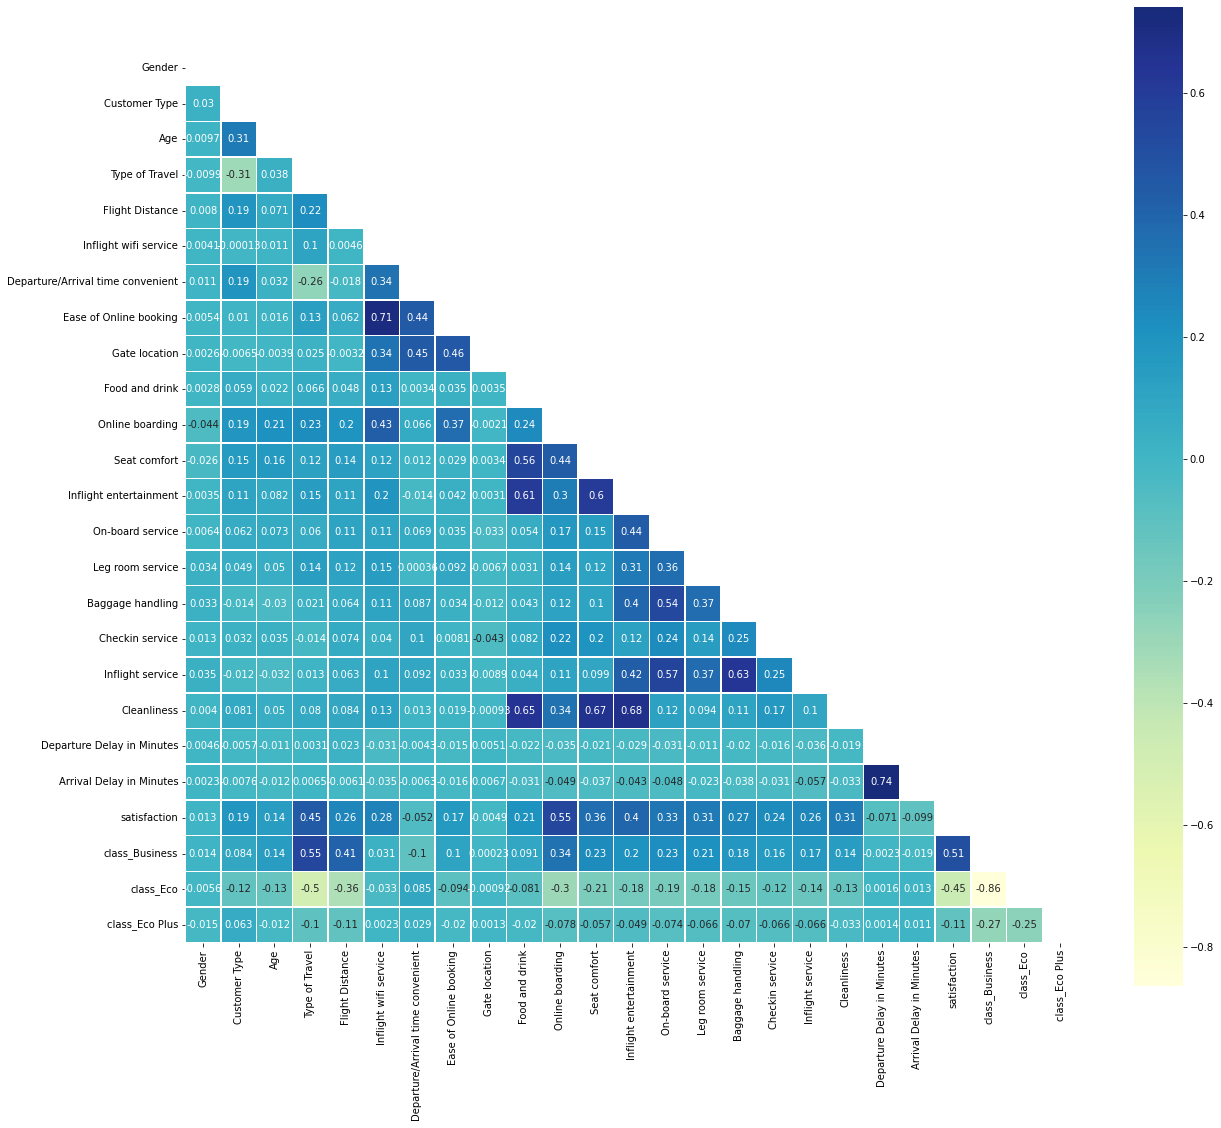

In [12]:
corr = df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

# Train Test Split

กำหนดตัวแปรต้น (X) และตัวแปรตาม (y)

In [13]:
# your code here
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

สร้าง Training Data และ Testing Data โดยกำหนด `test_size=0.2` และ `random_state=10`

In [14]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

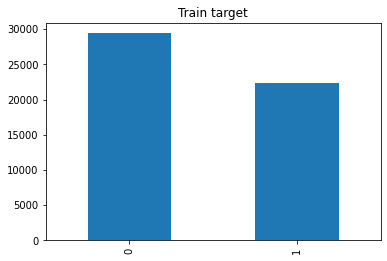

In [15]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar')

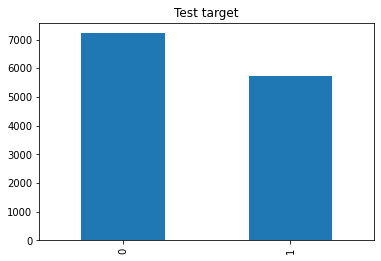

In [16]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

In [17]:
X_train

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,class_Business,class_Eco,class_Eco Plus
31460,1,1,27,0,983,3,4,3,1,1,3,2,1,5,2,5,4,5,1,0,0.0,0,1,0
10717,0,1,47,1,1041,2,2,2,2,1,4,4,2,2,2,2,2,2,2,4,20.0,0,1,0
49429,1,1,44,1,3795,5,5,5,5,3,5,5,4,4,4,4,4,4,3,0,0.0,1,0,0
32401,1,1,9,0,1035,2,4,2,3,5,2,5,5,3,3,4,5,4,5,12,0.0,0,1,0
44202,0,1,41,1,2084,1,1,1,1,5,5,4,4,4,5,4,4,4,5,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28105,1,1,55,0,374,4,4,4,1,3,4,3,3,5,4,4,3,5,3,0,0.0,0,1,0
50653,1,1,60,1,1635,2,2,2,2,3,5,5,4,4,4,4,4,4,3,0,3.0,1,0,0
29290,0,0,26,1,631,4,2,4,3,5,4,5,5,1,4,4,1,4,5,0,0.0,0,1,0
40185,0,1,41,1,1657,2,2,2,2,5,4,5,4,4,4,4,5,4,4,0,0.0,1,0,0


**Plot histogram สำหรับทุก features**

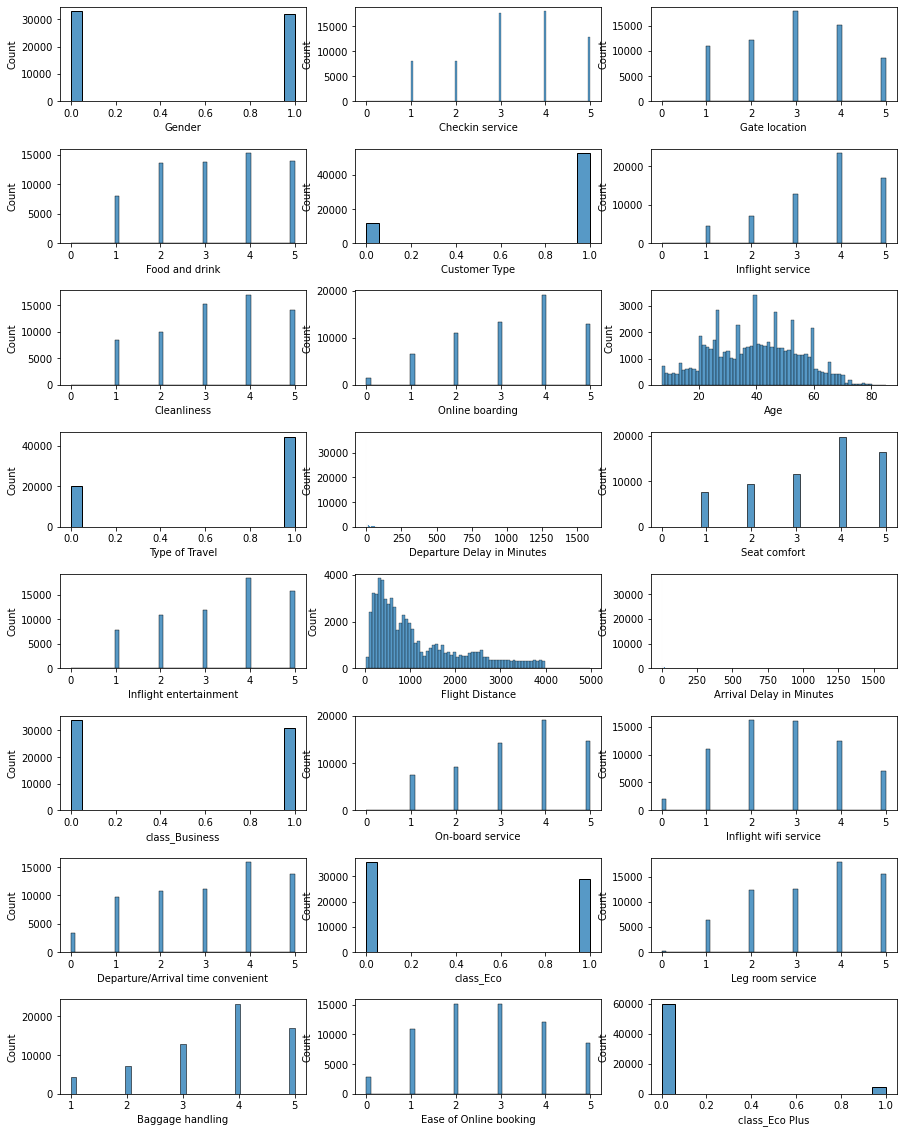

In [18]:
# Your code here
fig, axs = plt.subplots(8, 3, figsize=(15,20))
new_df = df.drop('satisfaction', axis=1)

for index, col in enumerate(new_df.columns):
  i = index % 8
  j = index % 3
  sns.histplot(data=new_df[col], ax=axs[i, j])

plt.subplots_adjust(hspace = 0.5)

**เช็คจำนวน data ในแต่ละ class ของ y**

In [19]:
# Your code here
y.value_counts()

0    36612
1    28127
Name: satisfaction, dtype: int64

***

# Logistic regression

**Train model Ligistic Regression โดยกำหนด solver='liblinear'**

In [20]:
# Create model named 'clf_lr' - use solver='liblinear'
# your code here
clf_lr = LogisticRegression(solver='liblinear')


# Train model
# your code here
clf_lr.fit(X_train, y_train)

lr_y_pred = clf_lr.predict(X_test)

**คำนวณ Cross-validation**

In [21]:
# your code here
print(f'Test data accuracy score: {np.round(clf_lr.score(X_test, y_test), 2)*100}%')

Test data accuracy score: 87.0%


In [22]:
# your code here
print(f'Cross val score: {np.mean(cross_val_score(clf_lr, X, y, cv=5, n_jobs=-1)).round(2)}')

Cross val score: 0.87


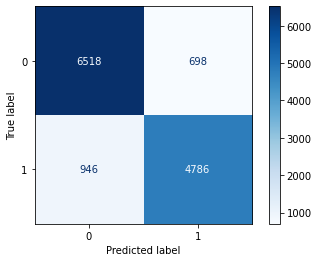

In [23]:
# Confusion matrix
plot_confusion_matrix(clf_lr, X_test, y_test, cmap='Blues', values_format='d')

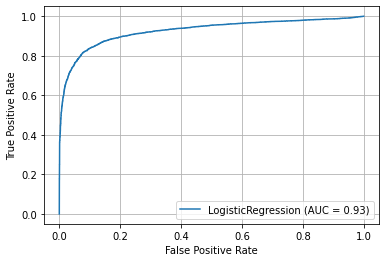

In [24]:
# AUC ROC curve
# your code here
plot_roc_curve(clf_lr, X_test, y_test)
plt.grid()

ตรวจสอบค่า Coefficient ของโมเดล

In [25]:
# your code here
clf_lr.coef_

array([[ 5.79747434e-02,  1.99151065e+00, -9.03320642e-03,
         2.70999754e+00, -3.16528829e-05,  3.85197116e-01,
        -1.27200376e-01, -1.67526978e-01,  3.46927700e-02,
        -4.41854860e-02,  6.01797381e-01,  5.91934681e-02,
         9.52964276e-02,  2.94408976e-01,  2.49172776e-01,
         1.09799249e-01,  3.46440361e-01,  1.14470469e-01,
         2.23196561e-01,  5.07560753e-03, -1.00576968e-02,
        -2.18631738e+00, -2.93080553e+00, -3.02765232e+00]])

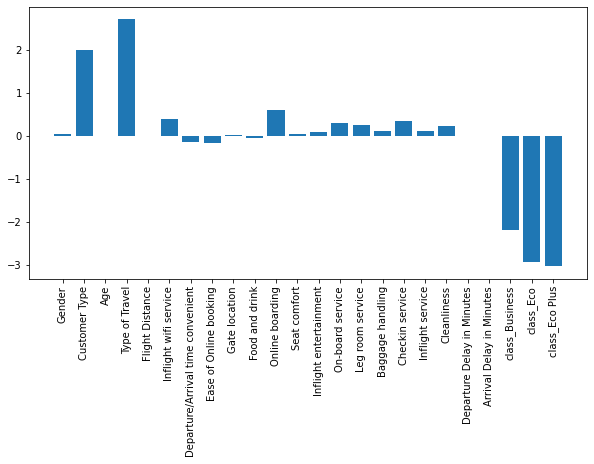

In [26]:
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, clf_lr.coef_[0])
plt.xticks(rotation=90)
plt.show()

# Decission Tree

**Train model Decision Tree**

In [27]:
# Create model named 'clf_dt' กำหนด random_state=10
# your code here
clf_dt = DecisionTreeClassifier()

# Train model
# your code here
clf_dt = clf_dt.fit(X_train, y_train)


# Predict named 'dt_y_pred'
# your code here
dt_y_pred = clf_dt.predict(X_test)

**คำนวณ Cross-validation**

In [28]:
# Print Test data accuracy score
# your code here
print(f'Test data accuracy score: {np.round(clf_dt.score(X_test, y_test), 2)*100}%')

# ใช้ cross_val_score เพื่อคำนวณ Cross-Validation กำหนด K-fold = 10
# your code here
dt_cross_val = cross_val_score(clf_dt, X, y, cv=10, n_jobs=-1)

# เรียกดูค่า Cross-Validation ในแต่ละรอบ
print('Cross val score')
# your code here
for i in range(len(dt_cross_val)):
  print(f'Fold {i+1}: {dt_cross_val[i]}')

# แสดงค่าเฉลี่ย Cross-Validation score
# your code here
print(f'Mean Cross Val score: {np.mean(dt_cross_val)}')

Test data accuracy score: 95.0%
Cross val score
Fold 1: 0.9467099165894347
Fold 2: 0.9405313561940069
Fold 3: 0.9479456286685203
Fold 4: 0.9397590361445783
Fold 5: 0.9468643805993203
Fold 6: 0.9423849243126352
Fold 7: 0.9477911646586346
Fold 8: 0.9436206363917208
Fold 9: 0.936360827927093
Fold 10: 0.9514908079715743
Mean Cross Val score: 0.9443458679457517


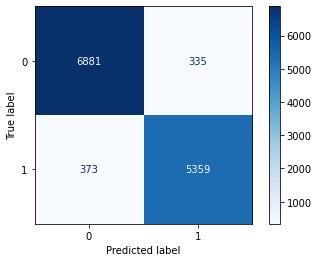

In [29]:
# Confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, cmap='Blues', values_format='d')

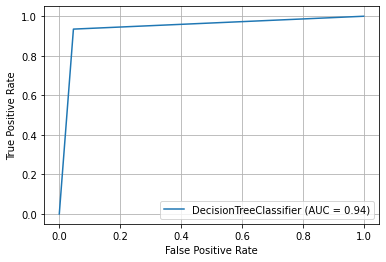

In [30]:
# Plot AUC curve
# your code here
plot_roc_curve(clf_dt, X_test, y_test)
plt.grid()

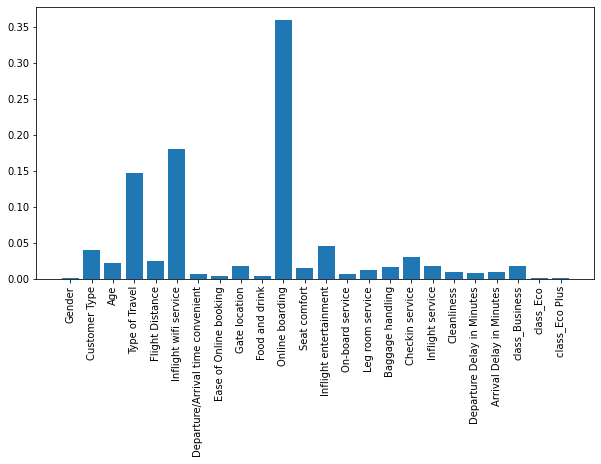

In [31]:
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, clf_dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Feature selection

**สร้าง model Desicion Tree โดยเลือกเฉพาะ feature: 'Age', 'Inflight wifi service', 'Leg room service','Online boarding', 'class_Business'**

In [32]:
# X_train_filter
# your code here
X_train_filter = X_train.loc[:, ['Type of Travel', 'Inflight wifi service', 'Customer Type', 'Online boarding', 'Inflight entertainment']]
X_test_filter = X_test.loc[:, ['Type of Travel', 'Inflight wifi service', 'Customer Type', 'Online boarding', 'Inflight entertainment']]
X_filter = X.loc[:, ['Type of Travel', 'Inflight wifi service', 'Customer Type', 'Online boarding', 'Inflight entertainment']]


In [33]:
# Create model named 'clf_dt_2' กำหนด random_state=10
# your code here
clf_dt_2 = DecisionTreeClassifier()

# Train model
# your code here
clf_dt_2.fit(X_train_filter, y_train)

# Predict named 'clf_dt2_y_pred' 
# your code here
clf_dt2_y_pred = clf_dt_2.predict(X_test_filter)

**คำนวณ Cross-Validation**

In [34]:
# Print Test data accuracy score
# your code here
print(f'Test data accuracy score: {np.round(clf_dt_2.score(X_test_filter, y_test), 2)*100}')
# ใช้ cross_val_score เพื่อคำนวณ Cross-Validation กำหนด K-fold = 10
# your code here
dt2_cross_val = cross_val_score(clf_dt_2, X_filter, y, cv=10, n_jobs=-1)
# เรียกดูค่า Cross-Validation ในแต่ละรอบ
print('Cross val score')
# your code here
for i in range(len(dt2_cross_val)):
  print(f'Fold {i+1}: {dt2_cross_val[i]}')
# แสดงค่า Mean Cross-Validation score
# your code here
print(f'Mean Cross val score: {np.mean(dt2_cross_val)}')


Test data accuracy score: 92.0
Cross val score
Fold 1: 0.933271547729379
Fold 2: 0.924158171146123
Fold 3: 0.9287920914426938
Fold 4: 0.9274019153537226
Fold 5: 0.9247760271856658
Fold 6: 0.9270929873339512
Fold 7: 0.9283286994130368
Fold 8: 0.9298733395118938
Fold 9: 0.9263206672845227
Fold 10: 0.9272362119573614
Mean Cross val score: 0.9277251658358349


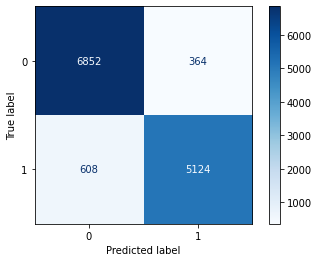

In [35]:
# Confusion matrix
plot_confusion_matrix(clf_dt_2, X_test_filter, y_test, cmap='Blues', values_format='d')

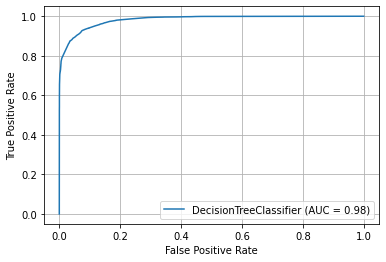

In [36]:
# Plot AUC curve
# your code here
plot_roc_curve(clf_dt_2, X_test_filter, y_test)
plt.grid()

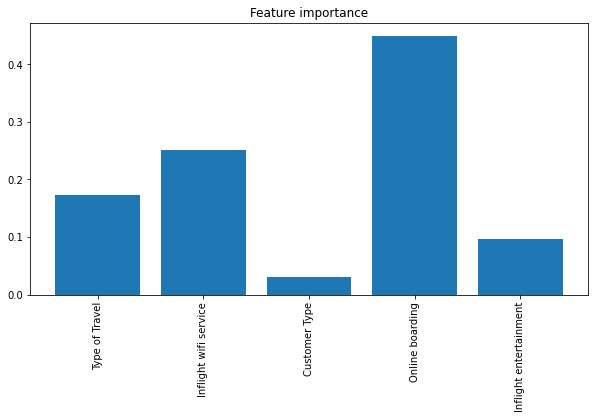

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(X_train_filter.columns, clf_dt_2.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

# SVM

**Train SVM model ด้วย `svm.SVC()` โดยกำหนด max_iter=10000, kernel='linear' และ C=2**

In [38]:
# Create model named 'clf_svm'
# your code here
clf_svm = svm.SVC(max_iter=10000, kernel='linear', C=2)
# Fit model
# your code here
clf_svm.fit(X_train, y_train)

print(f'Test data accuracy score: {np.round(clf_svm.score(X_test, y_test), 2)*100}%')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Test data accuracy score: 38.0%


**Train SVM model ด้วย `svm.SVC()` โดยกำหนด max_iter=10000, kernel='linear' และ C=10**

In [39]:
# Create model named 'clf_svm'
# your code here
clf_svm = svm.SVC(max_iter=10000, kernel='linear', C=10)
# Fit model
# your code here
clf_svm.fit(X_train, y_train)

print(f'Test data accuracy score: {np.round(clf_svm.score(X_test, y_test), 2)*100}%')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Test data accuracy score: 64.0%


**Question:** model ไหนให้ผลดีกว่า?

**ลองใช้ `GridSearchCV` โดยกำหนด hyperparameters ดังนี้**
```python
param_grid = [
  {'C': [10, 100], 'kernel': ['linear']},
  {'C': [10, 100], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
 ]
 ```

 Hint: for scoring option see this [link](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [42]:
# Your code here
from sklearn.model_selection import GridSearchCV
# Create param_grid
# your code here
param_grid = [
  {'C': [10, 100], 'kernel': ['linear']},
  # {'C': [10, 100], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
 ]

# Create GridSearchCV กำหนด max_iter=10000, random_state=10
# your code here
gs = GridSearchCV(svm.SVC(max_iter=5000), param_grid=param_grid, scoring='roc_auc', return_train_score=True)


In [43]:
# Fit GridSearchCV
# your code here
gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=5000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [44]:
results = gs.cv_results_

**แสดงค่า best parameter**

In [45]:
# your code here
gs.best_params_

{'C': 10, 'kernel': 'linear'}

**Train model SVM โดยใช้ best params**

In [47]:
# Create model named 'clf_svm' กำหนด max_iter=10000, kernel='linear', C=1
# your code here
clf_svm = svm.SVC(max_iter=10000, kernel='linear', C=10)
# Fit model
# your code here
clf_svm.fit(X_train, y_train)
# Predict model named 'svm_y_pred'
# your code here
svm_y_pred = clf_svm.predict(X_test)

print(f'Test data accuracy score: {np.round(clf_svm.score(X_test, y_test), 2)*100}%')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Test data accuracy score: 64.0%


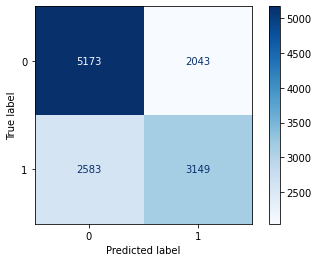

In [48]:
# วาด Confusion matrix
plot_confusion_matrix(clf_svm, X_test, y_test, cmap='Blues', values_format='d')

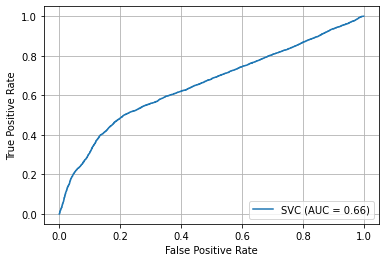

In [49]:
# Plot ROC curve
# your code here
plot_roc_curve(clf_svm, X_test, y_test)
plt.grid()

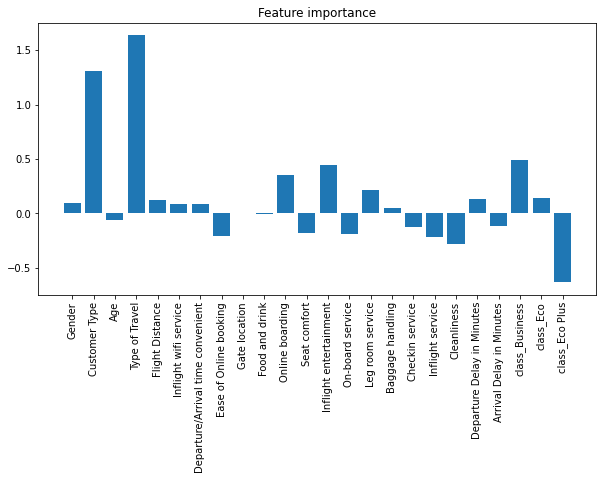

In [50]:
# Draw feature important chart using -> clf_svm.coef_[0]
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, clf_svm.coef_[0])
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

# KNN

**Train model KNN ด้วย `KNeighborsClassifier()` โดยกำหนด n_neighbors=5**

In [55]:
# Fit your KNN model here
acc = []
for k in range(2, 11):
  clf_knn = KNeighborsClassifier(n_neighbors=k)
  clf_knn.fit(X_train, y_train)
  knn_y_pred = clf_knn.predict(X_test)
  acc.append(clf_knn.score(X_test, y_test))
print(acc)
# Create model named 'clf_knn'
# your code here



# Fit model
# your code here

# Predict named 'knn_y_pred'
# your code here



# print(f'Test data accuracy score (K = {k}): {np.round(clf_knn.score(X_test, y_test), 2)*100}%')

[0.710302749459376, 0.7235866543095458, 0.7224281742354032, 0.7300741427247451, 0.7290701266604881, 0.7307692307692307, 0.7300741427247451, 0.7304603027494594, 0.7272165585418597]


**คำนวณ Cross validation score**

In [52]:
# use cross_val_score กำหนด K-fold = 10
# Your code here
knn_cv = cross_val_score(clf_knn, X, y, cv=10)

# แสดงค่า Cross-Validation ในแต่ละรอบ
# your code here
for i in range(len(knn_cv)):
  print('Fold %s : %s' %(i, knn_cv[i]))

# แสดงค่าเฉลี่ยของ Cross-Validation
# your code here
print("Mean cross val score ", np.mean(knn_cv))

Fold 0 : 0.7255174544331171
Fold 1 : 0.735248687055916
Fold 2 : 0.736793327154773
Fold 3 : 0.7333951189372876
Fold 4 : 0.7346308310163732
Fold 5 : 0.7343219029966018
Fold 6 : 0.7320049428483163
Fold 7 : 0.7434352795798579
Fold 8 : 0.7344763670064874
Fold 9 : 0.7386065193882281
Mean cross val score  0.7348430430416958


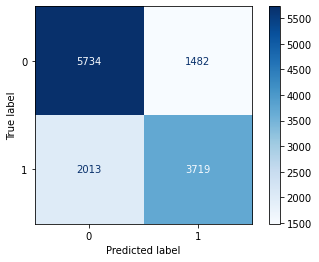

In [53]:
# วาด Confusion matrix
plot_confusion_matrix(clf_knn, X_test, y_test, cmap='Blues', values_format='d')

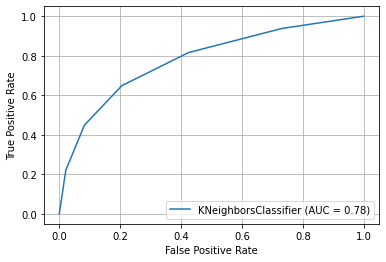

In [54]:
# Plot ROC curve
# your code here
plot_roc_curve(clf_knn, X_test, y_test)
plt.grid()

***
# Ensemble

For more info: [A Comprehensive Guide to Ensemble Learning (with Python codes)](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/)

**ทำ Majority Vote เพื่อเลือกผลลัพท์ที่ Model ทำนายออกมาเหมือนกันมากที่สุด**

In [56]:
# สร้าง DataFrame ของค่า predict แต่ละ model
# ถ้าพบ Error. ตรวจสอบชื่อตัวแปร y_pred ของแต่ละ model ว่าตรงกับด้านบนที่ทำไว้ไหม
voting_df = pd.DataFrame({'lr':lr_y_pred, 'dt_1':dt_y_pred, 
                          'dt_2':clf_dt2_y_pred, 'svm':svm_y_pred, 
                          'knn':knn_y_pred})

In [57]:
voting_df

,lr,dt_1,dt_2,svm,knn
0,1,1,1,1,1
1,1,1,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,1,0,1
...,...,...,...,...,...
12943,0,0,0,1,0
12944,0,0,0,0,0
12945,0,0,0,0,0
12946,0,0,0,1,1


หาผลรวมการทำนายของทุก model

In [58]:
# your code here
voting_df = voting_df.sum(axis=1)

In [59]:
voting_df

0        5
1        3
2        0
3        0
4        2
        ..
12943    1
12944    0
12945    0
12946    2
12947    1
Length: 12948, dtype: int64

**สร้างผลลัพธ์โดยกำหนดว่าถ้าผลรวมการทำนาย >= 3 ให้ทำนายเป็น 1 ถ้าไม่ใช่ = 0**

In [60]:
# your code here
result = voting_df.apply(lambda x:1 if x>=3 else 0)

In [61]:
print('Result:')
print(result)
print()
print('Accuracy Score:')
print(accuracy_score(y_test, result))

Result:
0        1
1        1
2        0
3        0
4        0
        ..
12943    0
12944    0
12945    0
12946    0
12947    0
Length: 12948, dtype: int64

Accuracy Score:
0.9046957059005252
